In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Customer Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Replacing blanks with 0 as tenure is 0 and no total charges are recorded.

In [4]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum().sum()

0

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
df.duplicated().sum()

0

In [9]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)  
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,No,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


### Converted 0 and 1 values of SeniorCitizen to Yes/No to make it easier to understand.

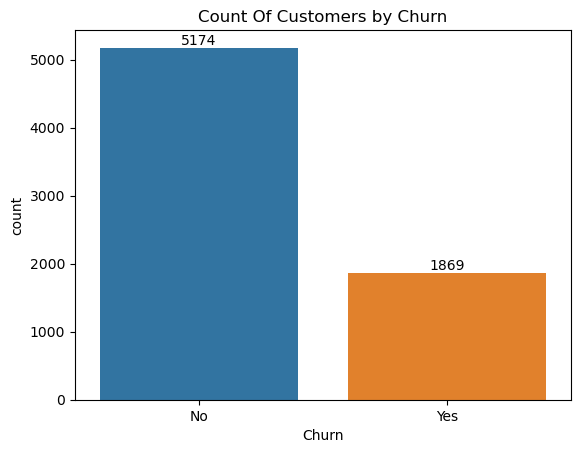

In [10]:
ax = sns.countplot(data = df , x = 'Churn')
ax.bar_label(ax.containers[0])
plt.title("Count Of Customers by Churn")
plt.show()

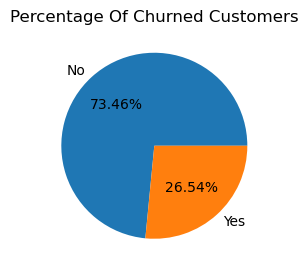

In [11]:
plt.figure(figsize = (3,4))
gb = df.groupby('Churn').agg({'Churn':'count'})
plt.pie(gb['Churn'] , autopct = "%1.2f%%" , labels = gb.index)
plt.title("Percentage Of Churned Customers")
plt.show()

### from the given pie chart we can conclude that 26.54% of our customers are churned out. 
### now let's explore the reason behind it

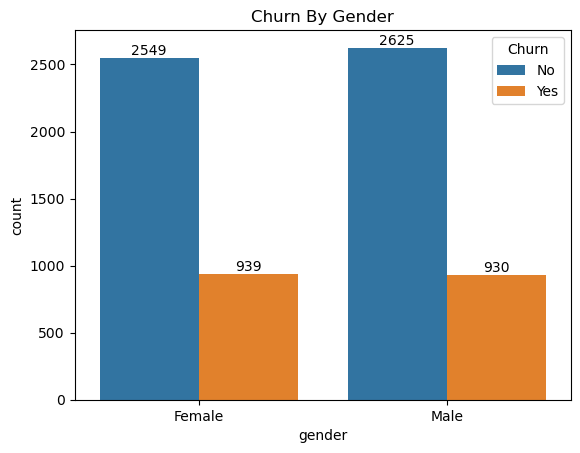

In [12]:
ax1 = sns.countplot(data = df , x = "gender" , hue = "Churn")
ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1])
plt.title("Churn By Gender")
plt.show()

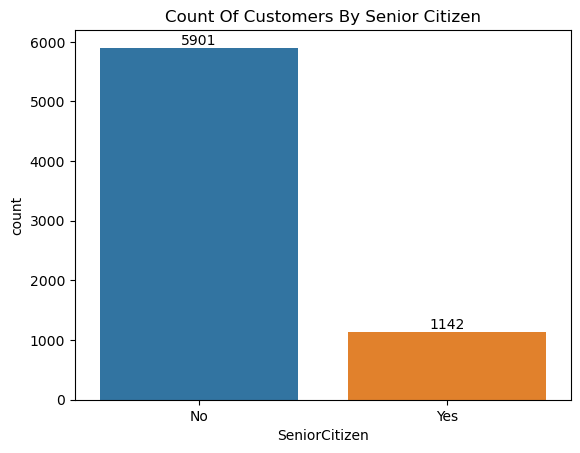

In [15]:
ax3 = sns.countplot(data = df , x = "SeniorCitizen")
ax3.bar_label(ax3.containers[0])
plt.title("Count Of Customers By Senior Citizen")
plt.show()

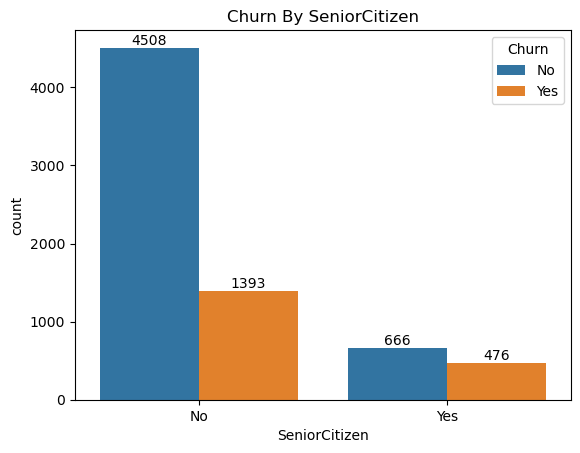

In [14]:
ax2 = sns.countplot(data = df , x = "SeniorCitizen" , hue = "Churn")
ax2.bar_label(ax2.containers[0])
ax2.bar_label(ax2.containers[1])
plt.title("Churn By SeniorCitizen")
plt.show()

### Comparatively a greater people in Senior Citizen Category have Churned Out.

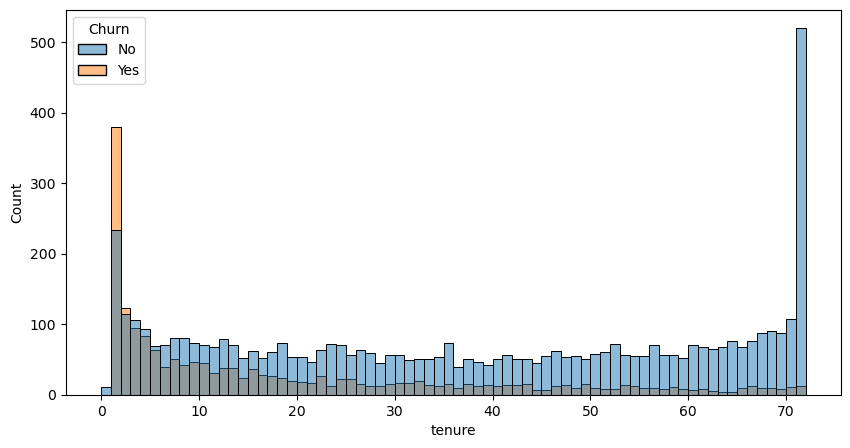

In [23]:
plt.figure(figsize = (10,5))
sns.histplot(data = df , x = 'tenure' , bins = 72 , hue = 'Churn')
plt.show()

### people who have used our services for a long time have stayed and people who have used our services 1 or 2 months have Churned Out.

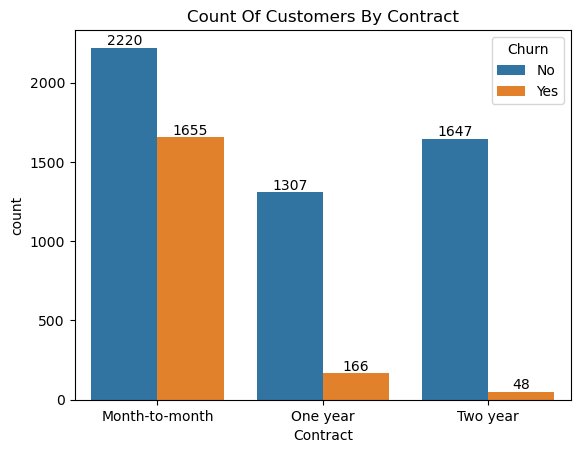

In [26]:
ax4 = sns.countplot(data = df , x = "Contract" , hue = "Churn")
ax4.bar_label(ax4.containers[0])
ax4.bar_label(ax4.containers[1])
plt.title("Count Of Customers By Contract")
plt.show()

### people who have month to month contract are likely to Churn then from those who have 1 or 2 years of Contract.

In [29]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

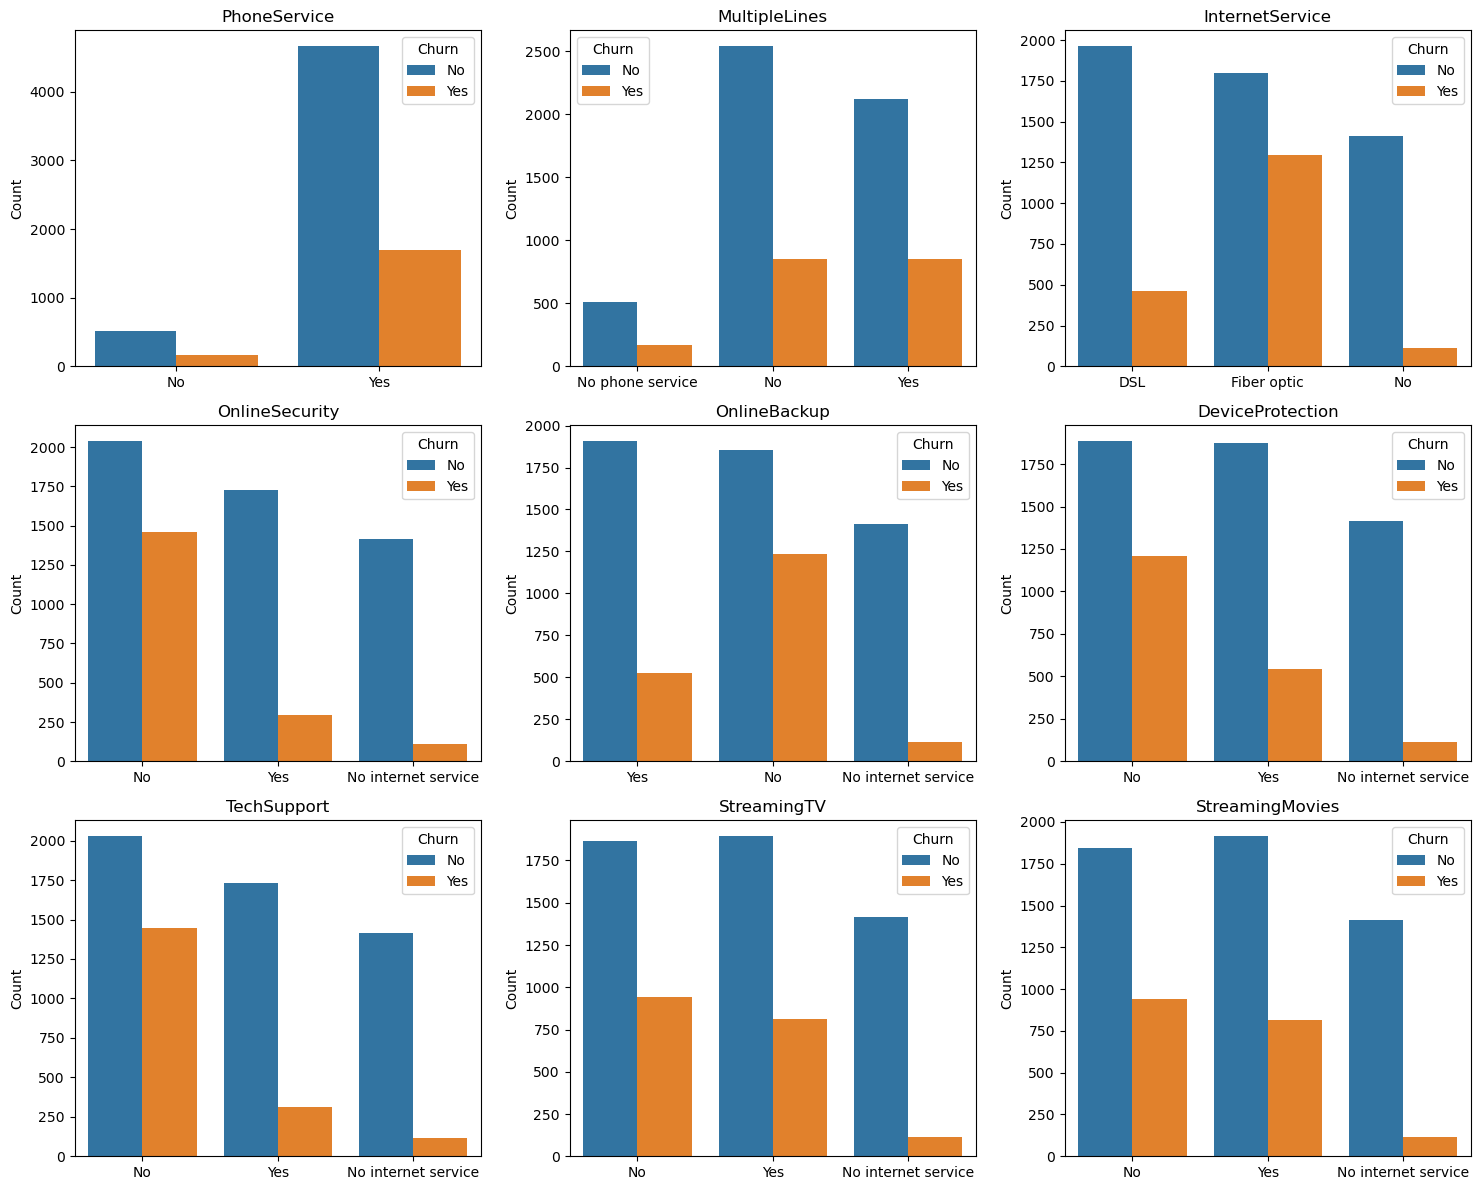

In [42]:
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(15, 12))

for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=df[col] , hue = df["Churn"])
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


#### Customers without extra services like online security, tech support, and backups tend to leave more often. Fiber optic internet users have a higher churn rate than DSL users. People with phone services are less likely to leave than those without. Streaming services do not have a strong impact on churn. Overall, customers with fewer services are more likely to leave.

In [ ]:
plt.figure(figsize = (12,5))
ax5 = sns.countplot(data = df , x = "PaymentMethod" , hue = "Churn")
ax5.bar_label(ax5.containers[0])
ax5.bar_label(ax5.containers[1])
plt.title("Count Of Customers By Contract")
plt.show()

### Customer is likely to Churn when he is using electronic check as a payment method